Accidents    0
dtype: int64


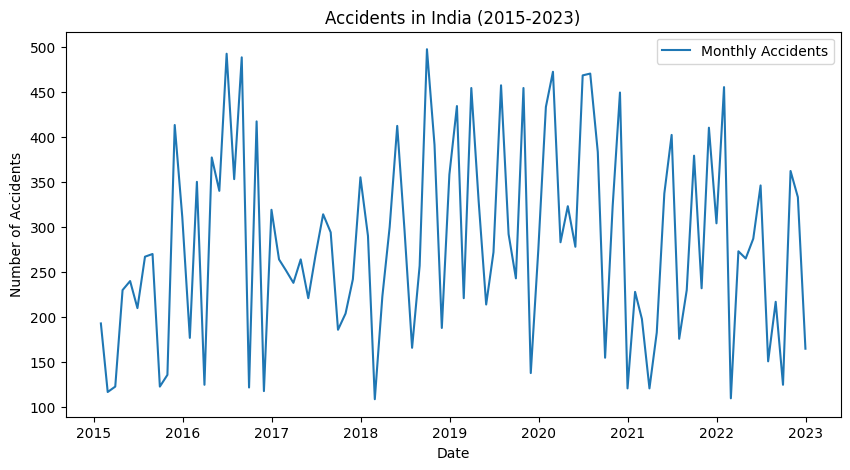

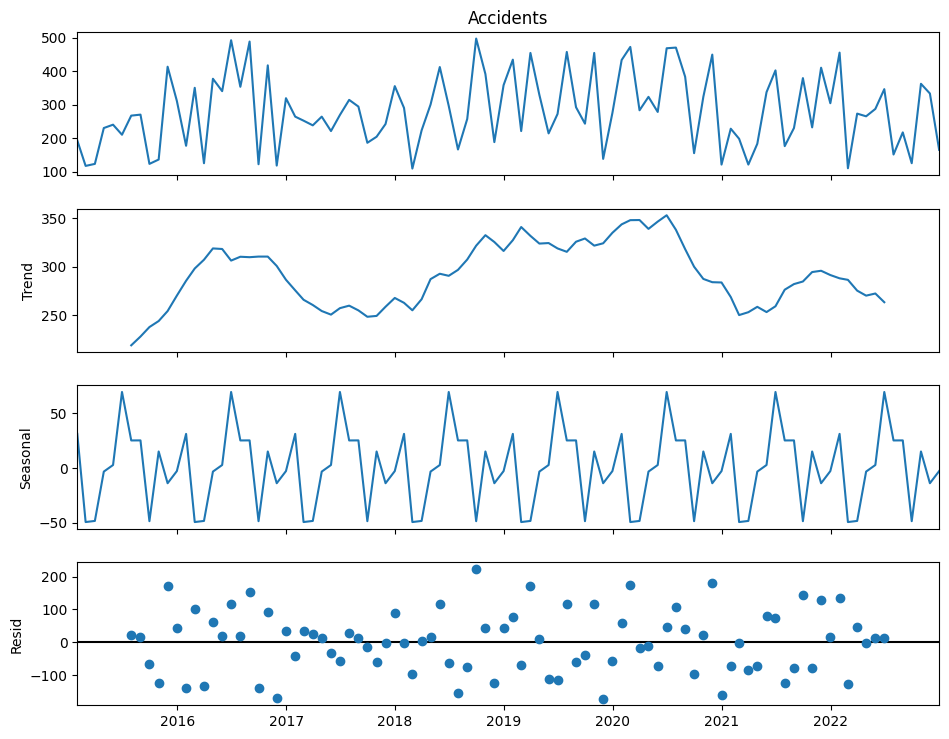

2023-01-31    269.680236
2023-02-28    265.463173
2023-03-31    265.633058
2023-04-30    265.626214
2023-05-31    265.626490
2023-06-30    265.626479
2023-07-31    265.626479
2023-08-31    265.626479
2023-09-30    265.626479
2023-10-31    265.626479
2023-11-30    265.626479
2023-12-31    265.626479
Freq: M, Name: predicted_mean, dtype: float64


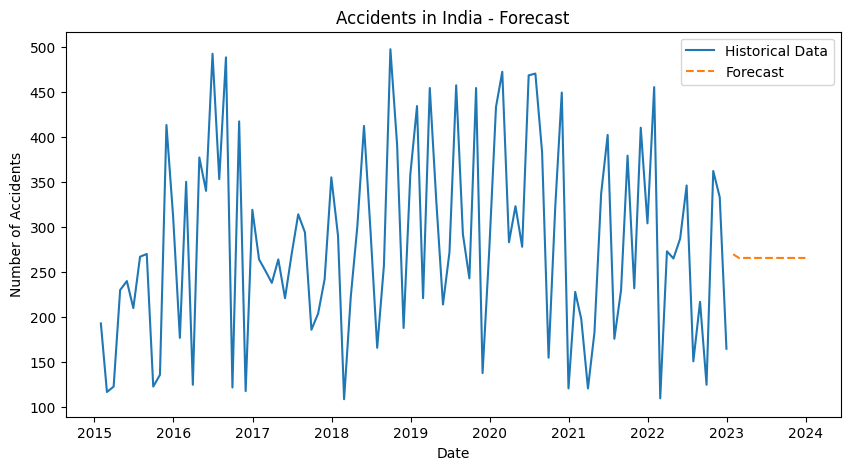

In [ ]:
 # Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Step 2: Load the Dataset
# For demonstration purposes, let's create a sample dataset
dates = pd.date_range(start='2015-01-01', end='2023-01-01', freq='M')
accidents = np.random.randint(100, 500, size=len(dates))  # Random data for accidents
data = pd.DataFrame({'Date': dates, 'Accidents': accidents})
data.set_index('Date', inplace=True)

# Step 3: Preprocess the Data
# Check for missing values
print(data.isnull().sum())

# Step 4: Visualize the Data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Monthly Accidents')
plt.title('Accidents in India (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

# Step 5: Decompose the Time Series
decomposition = seasonal_decompose(data['Accidents'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# Step 6: Fit a Time Series Model (ARIMA)
# Determine the order of the ARIMA model
# Here we use a simple ARIMA(1,1,1) for demonstration purposes
model = ARIMA(data['Accidents'], order=(1, 1, 1))
model_fit = model.fit()

# Step 7: Forecast Future Values
forecast = model_fit.forecast(steps=12)  # Forecasting for the next 12 months
print(forecast)

# Step 8: Visualize the Forecast
plt.figure(figsize=(10, 5))
plt.plot(data, label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Accidents in India - Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter

# Simulated dataset
data = {
    'Report_ID': [1, 2, 3, 4, 5],
    'Accident_Report': [
        "A severe accident occurred on the highway causing multiple injuries.",
        "A minor collision at the intersection led to no injuries.",
        "A fatal accident resulted in two deaths and several injuries.",
        "Traffic was halted due to a massive pile-up with several cars involved.",
        "A vehicle skidded off the road during heavy rain, but no major injuries were reported."
    ]
}

df = pd.DataFrame(data)

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
df['Cleaned_Report'] = df['Accident_Report'].apply(preprocess_text)

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['Sentiment'] = df['Cleaned_Report'].apply(get_sentiment)

# Function to count word frequencies
def get_word_frequencies(texts):
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    return word_freq

# Calculate word frequencies
word_freq = get_word_frequencies(df['Cleaned_Report'])

print(df)
print(word_freq)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Report_ID                                    Accident_Report  \
0          1  A severe accident occurred on the highway caus...   
1          2  A minor collision at the intersection led to n...   
2          3  A fatal accident resulted in two deaths and se...   
3          4  Traffic was halted due to a massive pile-up wi...   
4          5  A vehicle skidded off the road during heavy ra...   

                                      Cleaned_Report  Sentiment  
0  severe accident occurred highway causing multi...   0.000000  
1          minor collision intersection led injuries  -0.050000  
2  fatal accident resulted two deaths several inj...   0.000000  
3  traffic halted due massive pileup several cars...  -0.041667  
4  vehicle skidded road heavy rain major injuries...  -0.068750  
Counter({'injuries': 4, 'accident': 2, 'several': 2, 'severe': 1, 'occurred': 1, 'highway': 1, 'causing': 1, 'multiple': 1, 'minor': 1, 'collision': 1, 'intersection': 1, 'led': 1, 'fatal': 1, 'resulte

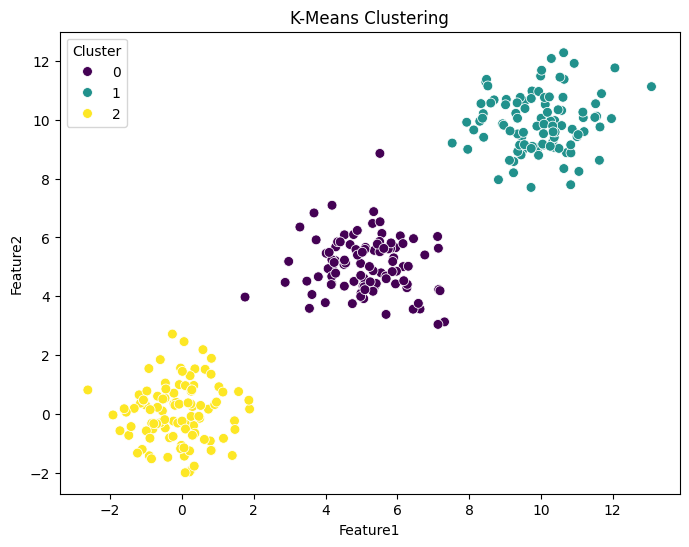

Confusion Matrix:
[[15  1  0]
 [ 0 22  0]
 [ 0  0 22]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        22

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



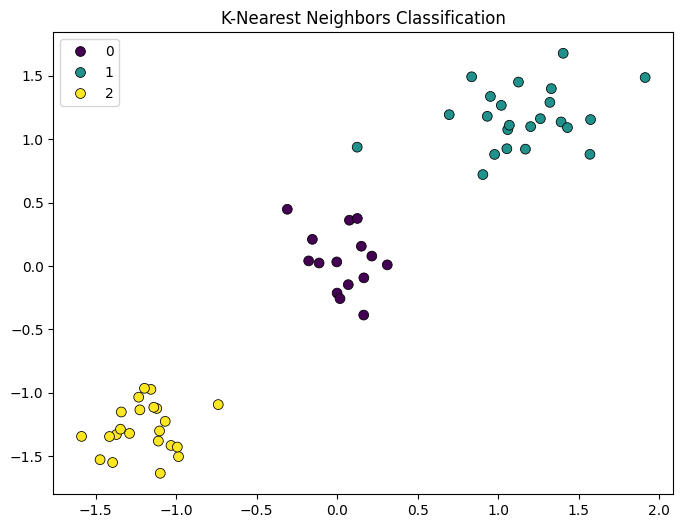

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation
# Generate synthetic data for clustering
np.random.seed(42)
X1 = np.random.normal(0, 1, (100, 2))  # Cluster 1
X2 = np.random.normal(5, 1, (100, 2))  # Cluster 2
X3 = np.random.normal(10, 1, (100, 2))  # Cluster 3

# Combine into one dataset
X = np.vstack((X1, X2, X3))
y = np.array([0]*100 + [1]*100 + [2]*100)  # Labels for classification

# Convert to a DataFrame
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Label'] = y

# Step 2: Data Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Feature1', 'Feature2']])

# Step 3: Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Feature1', y='Feature2', hue='Cluster', palette='viridis', s=50)
plt.title('K-Means Clustering')
plt.show()

# Step 4: Classification using K-Nearest Neighbors
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Cluster'], test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Step 5: Evaluation
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Classification
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis', s=50, marker='o', edgecolor='k')
plt.title('K-Nearest Neighbors Classification')
plt.show()
